# Modelo de fraude con tarjeta de crédito

In [1]:
#librerías útiles para el análisis de datos de fraude crediticio y modelo de clasificación con Ml (Regresión Logística)
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

In [2]:
#data frame de datos
df = pd.read_csv('C:/users/I_am_AlexX/Downloads/dataset.csv')
df.head(100)

Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0       221547 -1.191668  0.428409  1.640028 -1.848859 -0.870903 -0.204849   
1       184524  1.966614 -0.450087 -1.228586  0.142873 -0.150627 -0.543590   
2        91201  1.528452 -1.296191 -0.890677 -2.504028  0.803202  3.350793   
3        26115 -0.774614  1.100916  0.679080  1.034016  0.168633  0.874582   
4       201292 -1.075860  1.361160  1.496972  2.242604  1.314751  0.272787   
..         ...       ...       ...       ...       ...       ...       ...   
95       73677 -7.634269 -6.707354 -0.241171  1.976675  3.678701 -1.580480   
96      227355  2.199973 -1.835699 -0.204886 -1.538868 -1.856685  0.081376   
97      224917  1.906371 -0.306524 -1.309881  0.052227  0.663329  0.846109   
98       20671 -1.331040  0.519220  1.333915 -0.721706  0.442685  1.844601   
99      127321  0.336017 -2.326138 -0.431161  0.021309 -1.724735 -1.131683   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0  -0.385675  0.352793 -1.098301  ...  0.507173  1.292565 -0.467752  1.244887   
1  -0.076217 -0.108390  0.973310  ...  0.124055  0.564916 -0.039331 -0.283904   
2  -1.633016  0.815350 -1.884692  ... -0.412088 -1.017485  0.129566  0.948048   
3   0.209454  0.770550 -0.558106  ...  0.011158  0.146017 -0.130401 -0.848815   
4   1.005246  0.132932 -1.558317  ...  0.254485  0.530692 -0.651119  0.626389   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95 -1.702900 -2.784952  0.372500  ... -2.688898  2.068714  5.879806 -0.247832   
96 -1.919213  0.174229 -0.337821  ... -0.167601 -0.092552  0.335077  0.405124   
97 -0.213912  0.315934  0.375599  ... -0.179649 -0.330797  0.381189 -1.430055   
98 -0.410840  1.277316 -0.173956  ...  0.353142  1.120865 -0.076059 -1.296679   
99  0.330797 -0.346564 -0.544115  ...  0.482910  0.096154 -0.585701  0.750062   

         V25       V26       V27       V28  Amount  Class  
0   0.697707  0.059375 -0.319964 -0.017444   27.44      0  
1   0.186400  0.192932 -0.039155 -0.071314   35.95      0  
2   0.287826 -0.396592  0.042997  0.025853   28.40      0  
3   0.005698 -0.183295  0.282940  0.123856   43.20      0  
4   1.040212  0.249501 -0.146745  0.029714   10.59      0  
..       ...       ...       ...       ...     ...    ...  
95  1.071922  0.698133  1.639290 -1.869431   27.41      0  
96 -0.547281 -0.261286  0.046356 -0.023188   46.00      0  
97 -0.530028  0.300685 -0.025098 -0.086223    1.98      0  
98 -0.298831  0.578759  0.260083  0.066003   25.65      0  
99  0.475790 -0.137842 -0.126040  0.099005  561.90      0  

[100 rows x 31 columns]

Vemos las dimensiones del data set para saber el tipo de librerías a usar:

In [3]:
df.shape

(7300, 31)

In [4]:
df.columns.values

array(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

Vemos si hay elementos NAN en el data frame , para ver si se requiere hacer data wrangling adicional:

In [5]:
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

Dada la forma del data frame, la variable de estudio será la variable clase(class) también llamada la variable objetivo o variable de respuesta. Veamos la cantidad de datos por clase en esta variable:

In [6]:
df['Class'].value_counts()

0    7000
1     300
Name: Class, dtype: int64

Usando la convención de que el número 1 representa casos positivos sobre algún fenómeno, y el 0 un caso negativo, entonces podemos hacer un primer análisis de datos, sobre los porcentajes de cada uno de ellos en este data set:

In [7]:
total = df.shape[0]

fraude_positivo = df[df.Class == 1]
fraude_negativo = df[df.Class == 0]

x = len(fraude_positivo)/total
y = len(fraude_negativo)/total

print('fraude_positivo :',"{0:.2f}".format(x*100),'%')
print('fraude_negativo :',"{0:.2f}".format(y*100),'%')

fraude_positivo : 4.11 %
fraude_negativo : 95.89 %


En este caso el 1 representaría un caso positivo de fraude crediticio, y un 0 un caso negativo de fraude crediticio. Dada las características de la variable de respuesta que se busca clasificar (0 o 1) vemos que es factible usar la regresión logítica como modelo clasificador. 

## Histograma de casos

A continuación se muestra un histograma de los casos positivos y negativos de fraude crediticio de nuestro conjunto de datos que nos ayudará a ver la distribución de los mismos.

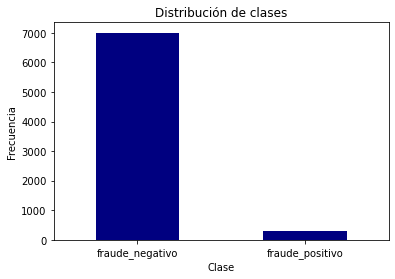

In [8]:
casos = ['fraude_negativo','fraude_positivo']
clase_fraude = pd.value_counts(df.Class, sort = True)
clase_fraude.plot(kind = 'bar',color = 'navy', rot=0)
plt.title("Distribución de clases")
plt.xticks(range(2), casos)
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.savefig('HistPorcenta',dpi=300)

## Distribución de la variable "Amount"

La variable amount nos dará visibilidad de la distribución de la cantidad (de dinero) asociada a cada crédito dentro del data frame. Analizando la gráfica podemos darnos cuenta de que la mayoría de los créditos se encuentran en un rango de 0 a 200 para la cantidad de amount.

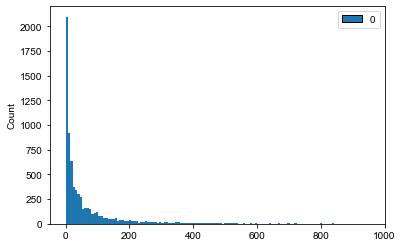

In [9]:
fig, ax = plt.subplots()
amount = [df.Amount.values]
sns.histplot(amount,color = 'navy',alpha = 1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlim(-50, 1000)
plt.show()

## Distribución de la variable desconocida (primera columna sin "header")

Con la función head podemos darnos cuenta de que la variable desconocida (Unnamed) aparenta ser un identificador dada la variabilidad de los números en este campo. Esto puede comprobarse verificando la cantidad de valores únicos en esta columna con el atributo <code> unique() </code> :

In [10]:
len(df.iloc[:, 0].unique())

7300

Vemos que efectivamente hay 7300 valores únicos para esta variable por lo que la inferencia de que era un ID es correcta.

En las siguientes gráficas podemos obervar las distribuciones de las variables predictoras en donde el rojo representa los casos positivos de fraude crediticio, y el azul los casos negativos de fraude crediticio, con la finalidad de ver la distribución de valores que adquiere cada variable según su valor de clase (class).

In [11]:
#df.max() #Deshinibir para ver la cantidad máxima de valores que adquiere cada columna

In [12]:
#df.min() # Deshinibir para ver la cantidad mínima de valores que adquiere cada columna

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

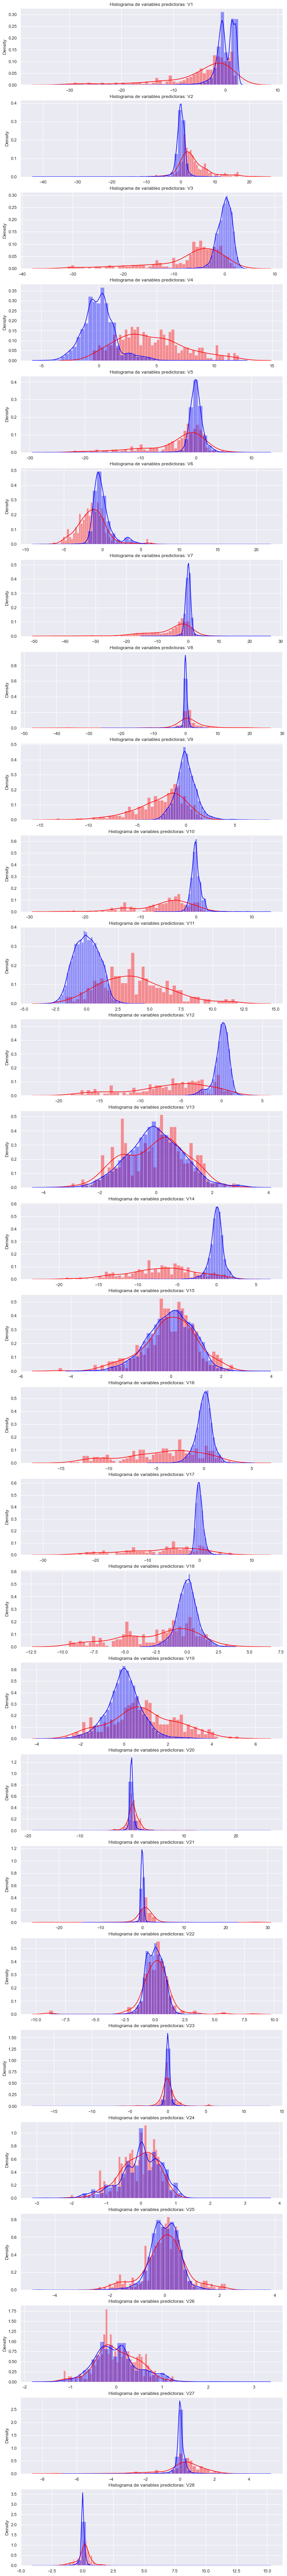

In [13]:
var_predic = df.iloc[:,1:29].columns

plt.figure(figsize=(12,120))
gs = gridspec.GridSpec(28, 1)
for i, row in enumerate(df[var_predic]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[row][df.Class == 1], bins=50,color="red")
    sns.distplot(df[row][df.Class == 0], bins=50,color="blue")
    ax.set_xlabel('')
    ax.set_title('Histograma de variables predictoras: ' + str(row))
    #plt.savefig('figvarios',dpi=300)
plt.show()


Creamos listas que almacenen la información de las etiquetas de cada variable en el Data Frame que se usarán para hacer el modelo de clasificación.

In [14]:
var_num_0_10=['V1', 'V2', 'V3','V4', 'V5', 'V6', 'V7','V8','V9','V10']

In [15]:
var_num_10_20=['V11', 'V12', 'V13','V14', 'V15', 'V16', 'V17','V18','V19','V20']

In [16]:
var_num_20_28=['V21', 'V22', 'V23','V24', 'V25', 'V26', 'V27','V28']

## Evalúa la correlación de las variables predictoras

El siguiente análisis de correlación entre las variables es relevante puesto que,|que cuando la correlación entre variables es muy alta, se genera un incremento en los errores estándar, lo cual hace que los coeficientes estimados no sean confiables, y en consecuencia, las estimaciones sean poco creíbles.

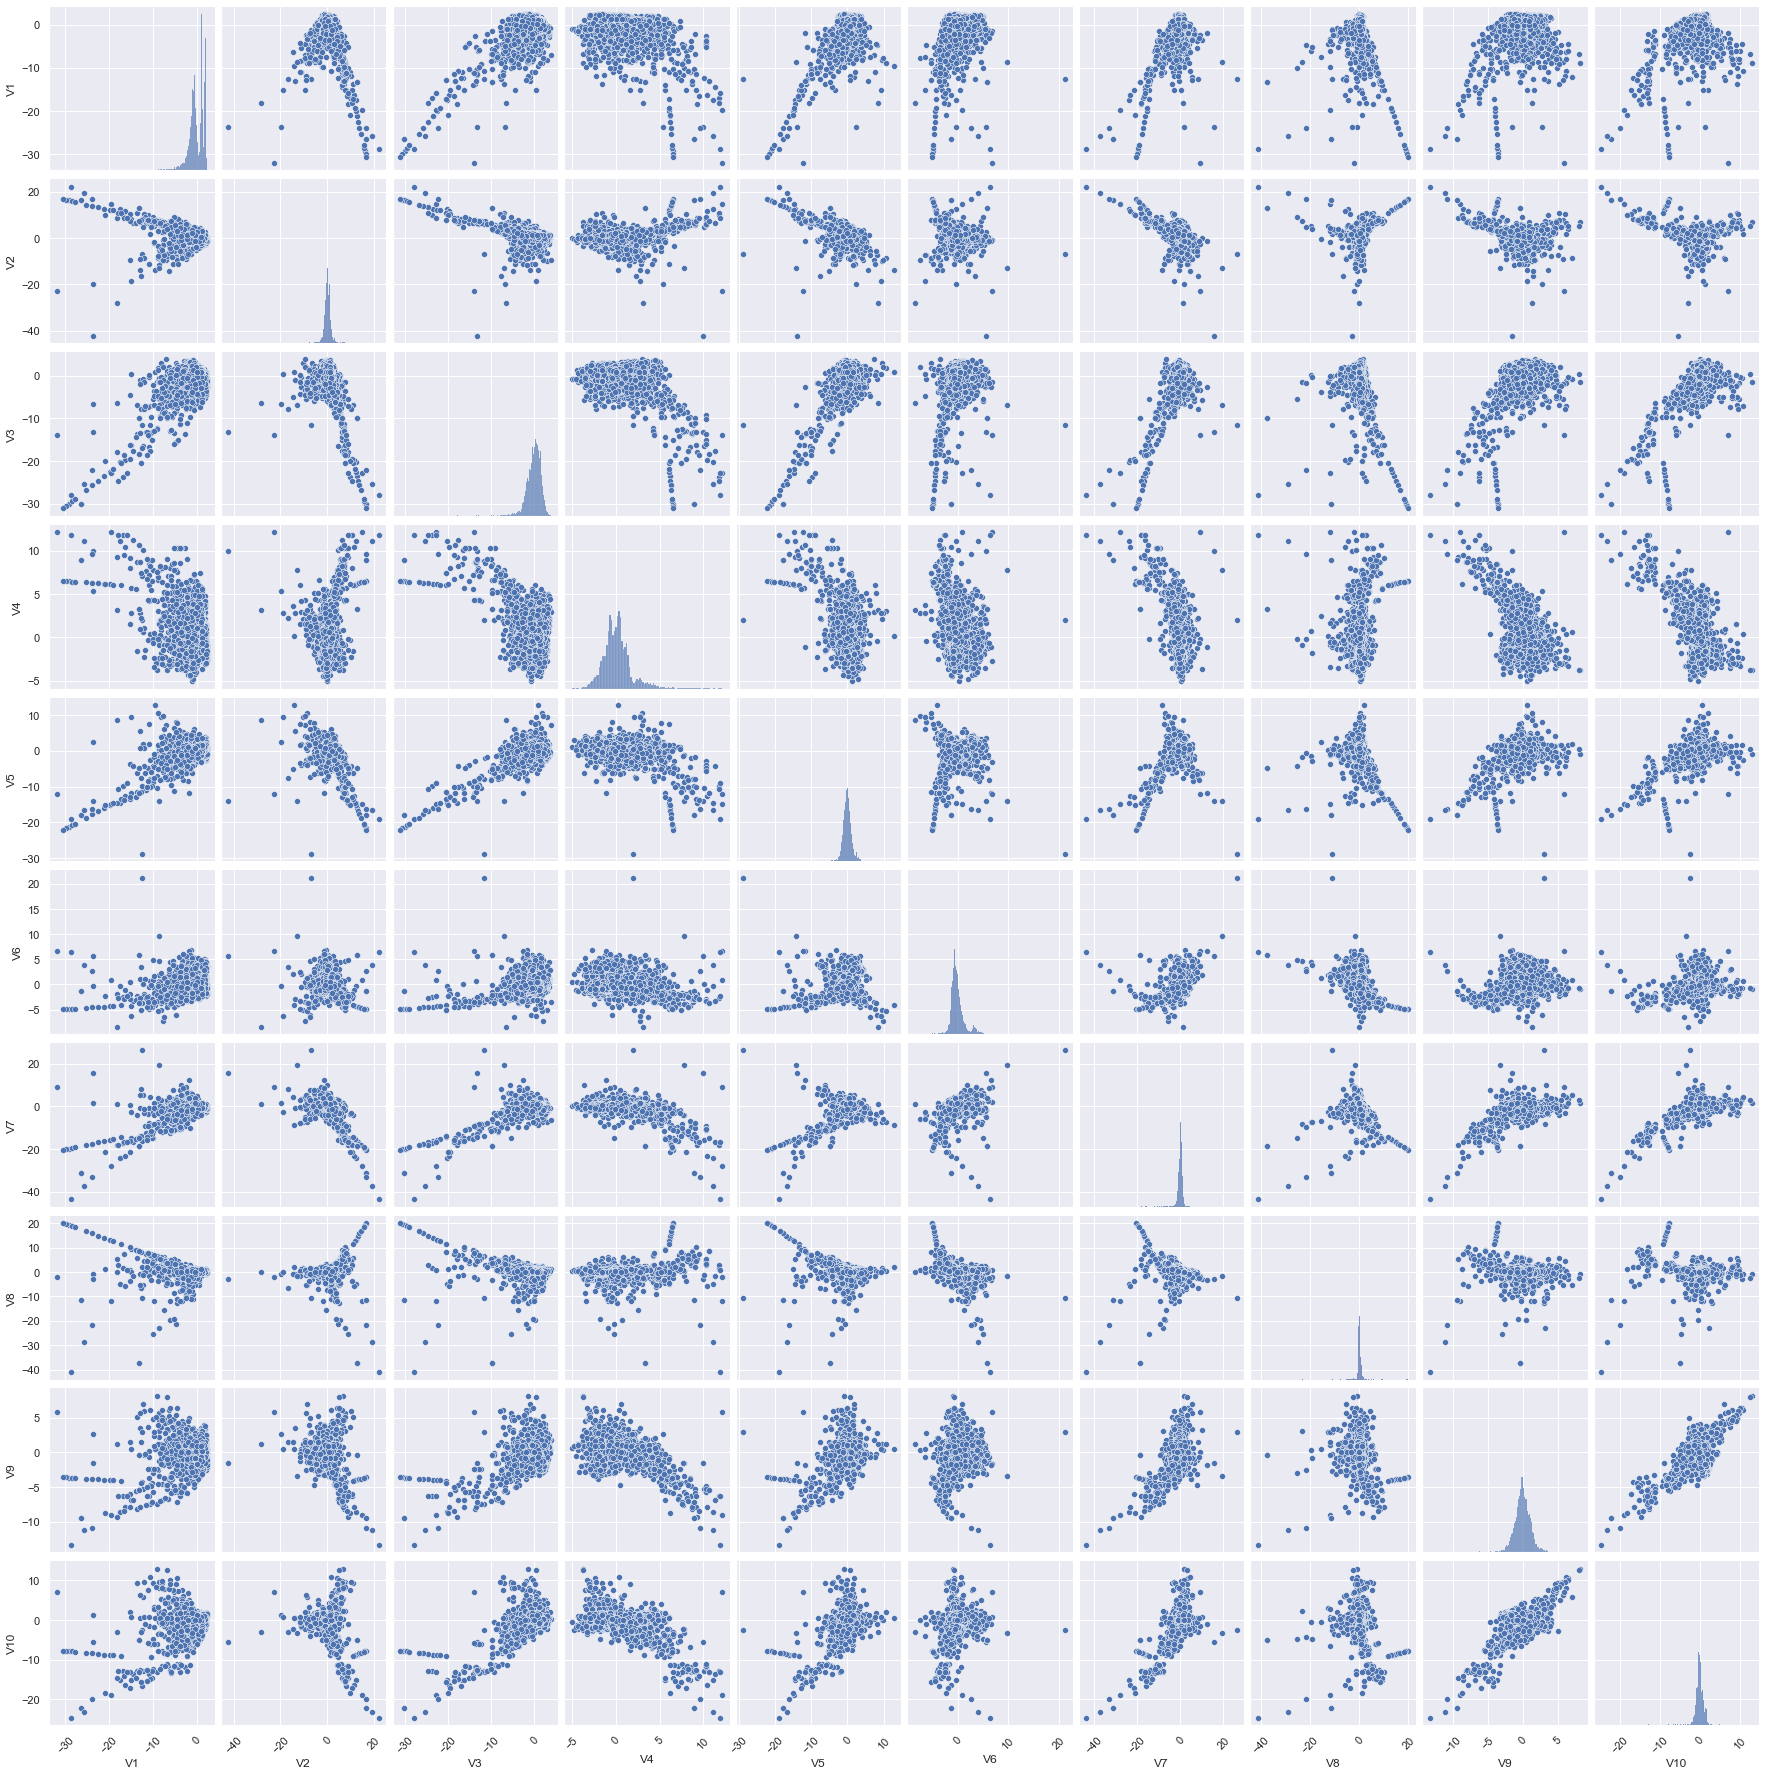

In [17]:
g=sns.pairplot(df[var_num_0_10],diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)
#plt.savefig('fig1',dpi=300)

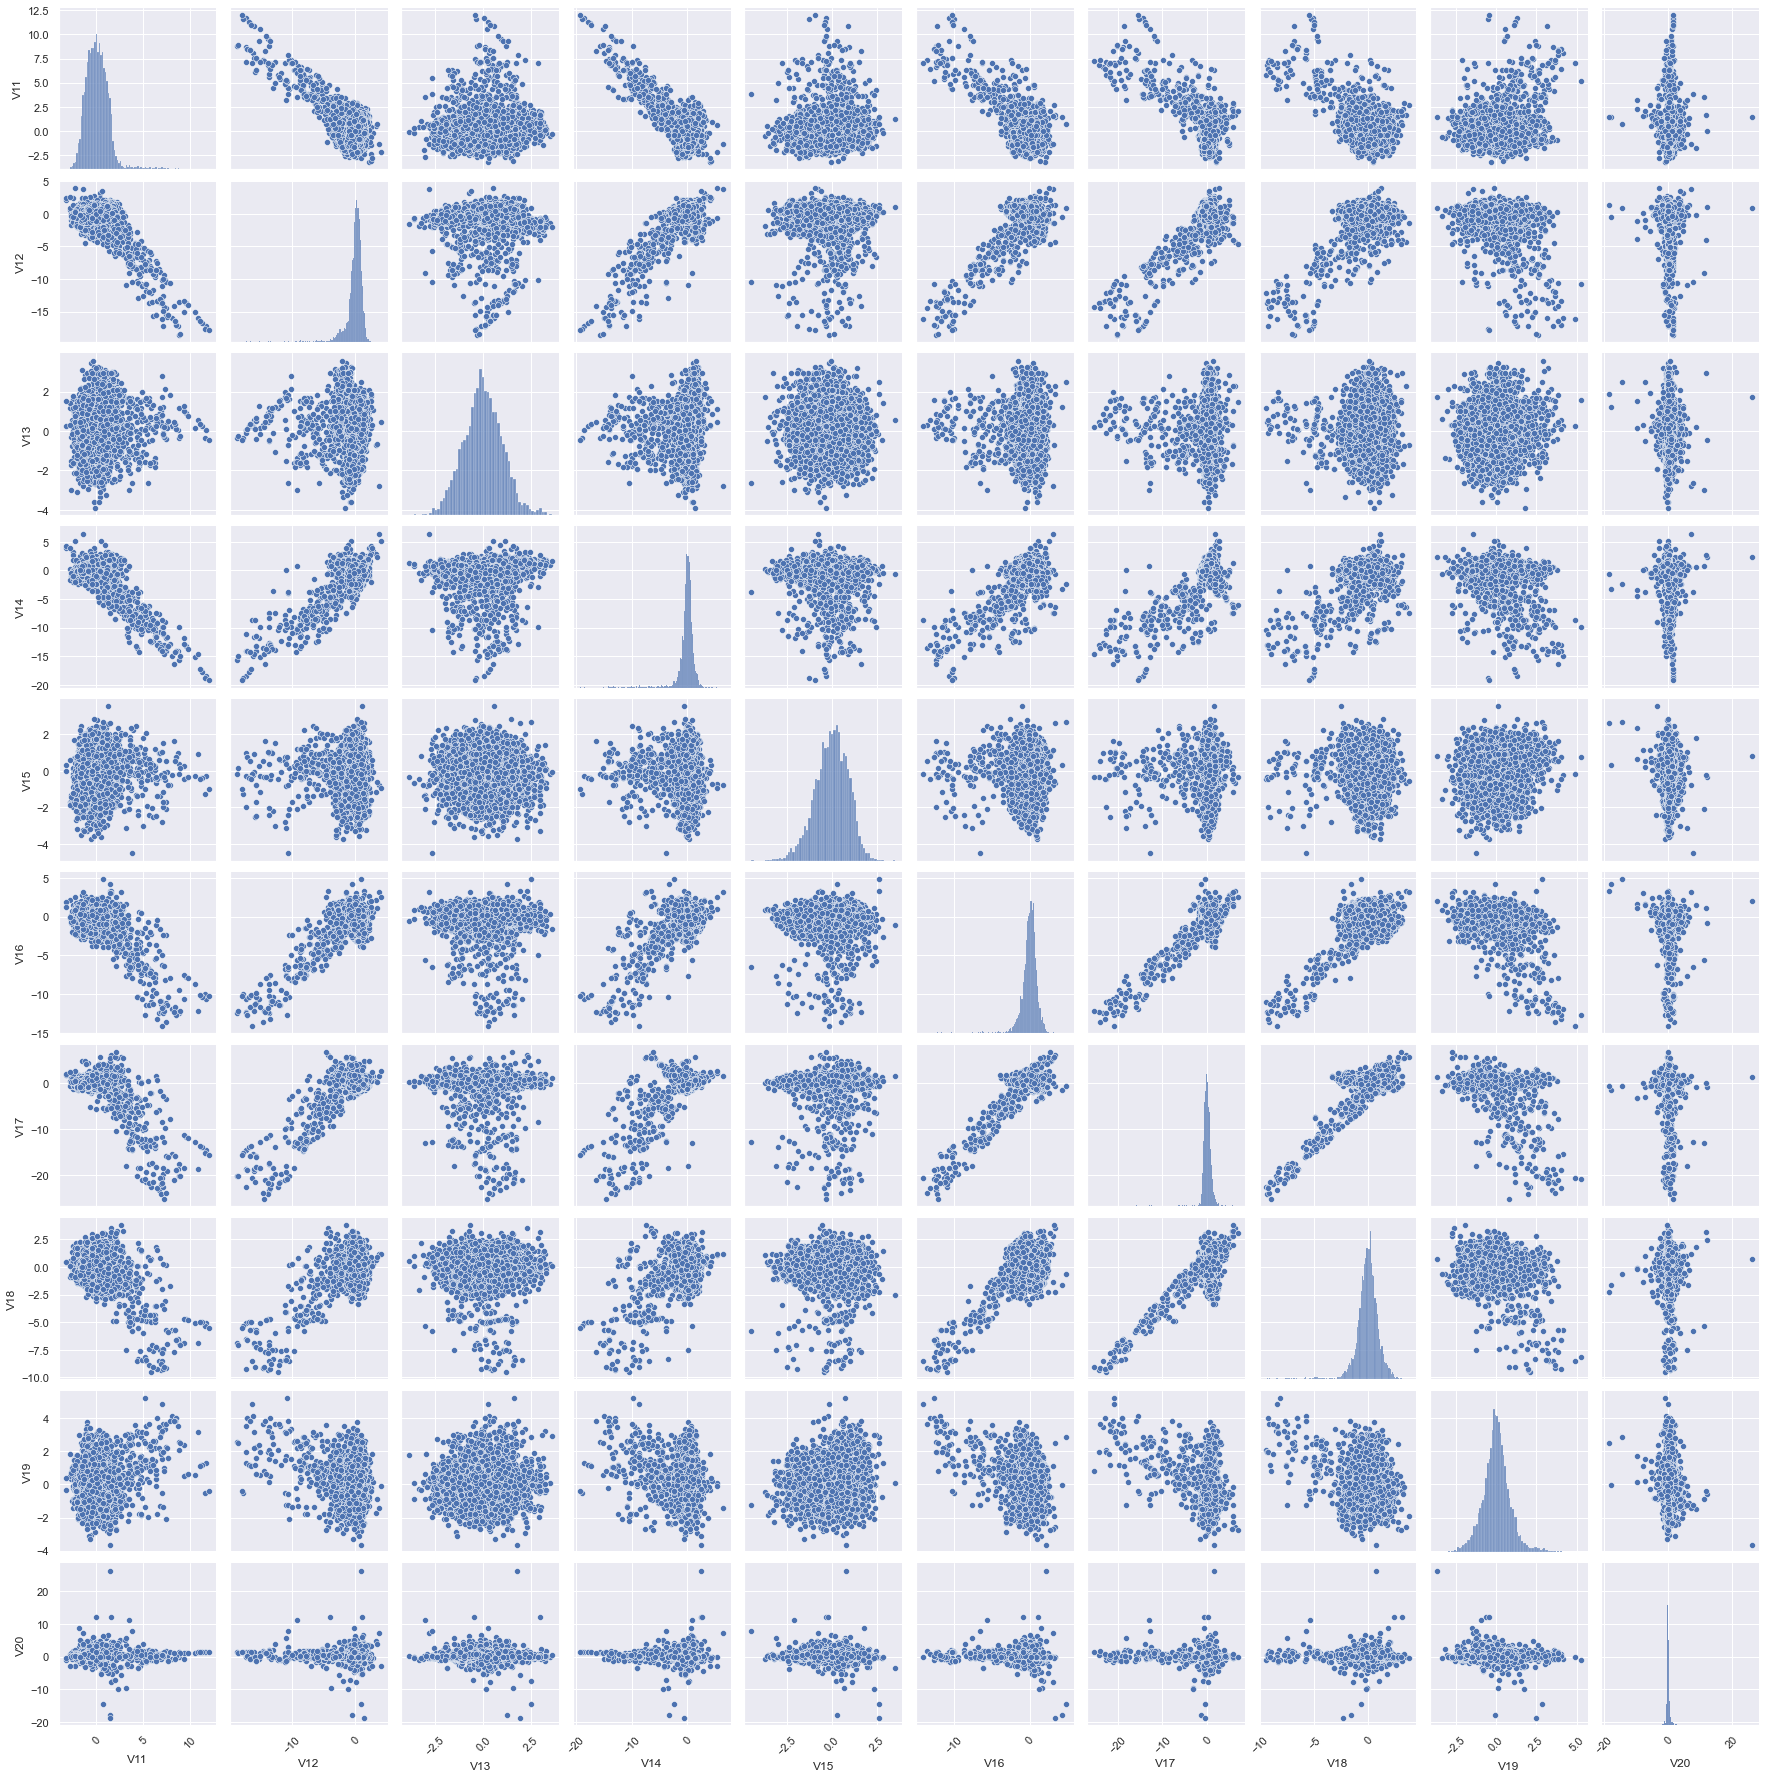

In [18]:
g=sns.pairplot(df[var_num_10_20],diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)
    
#plt.savefig('fig2',dpi=300)

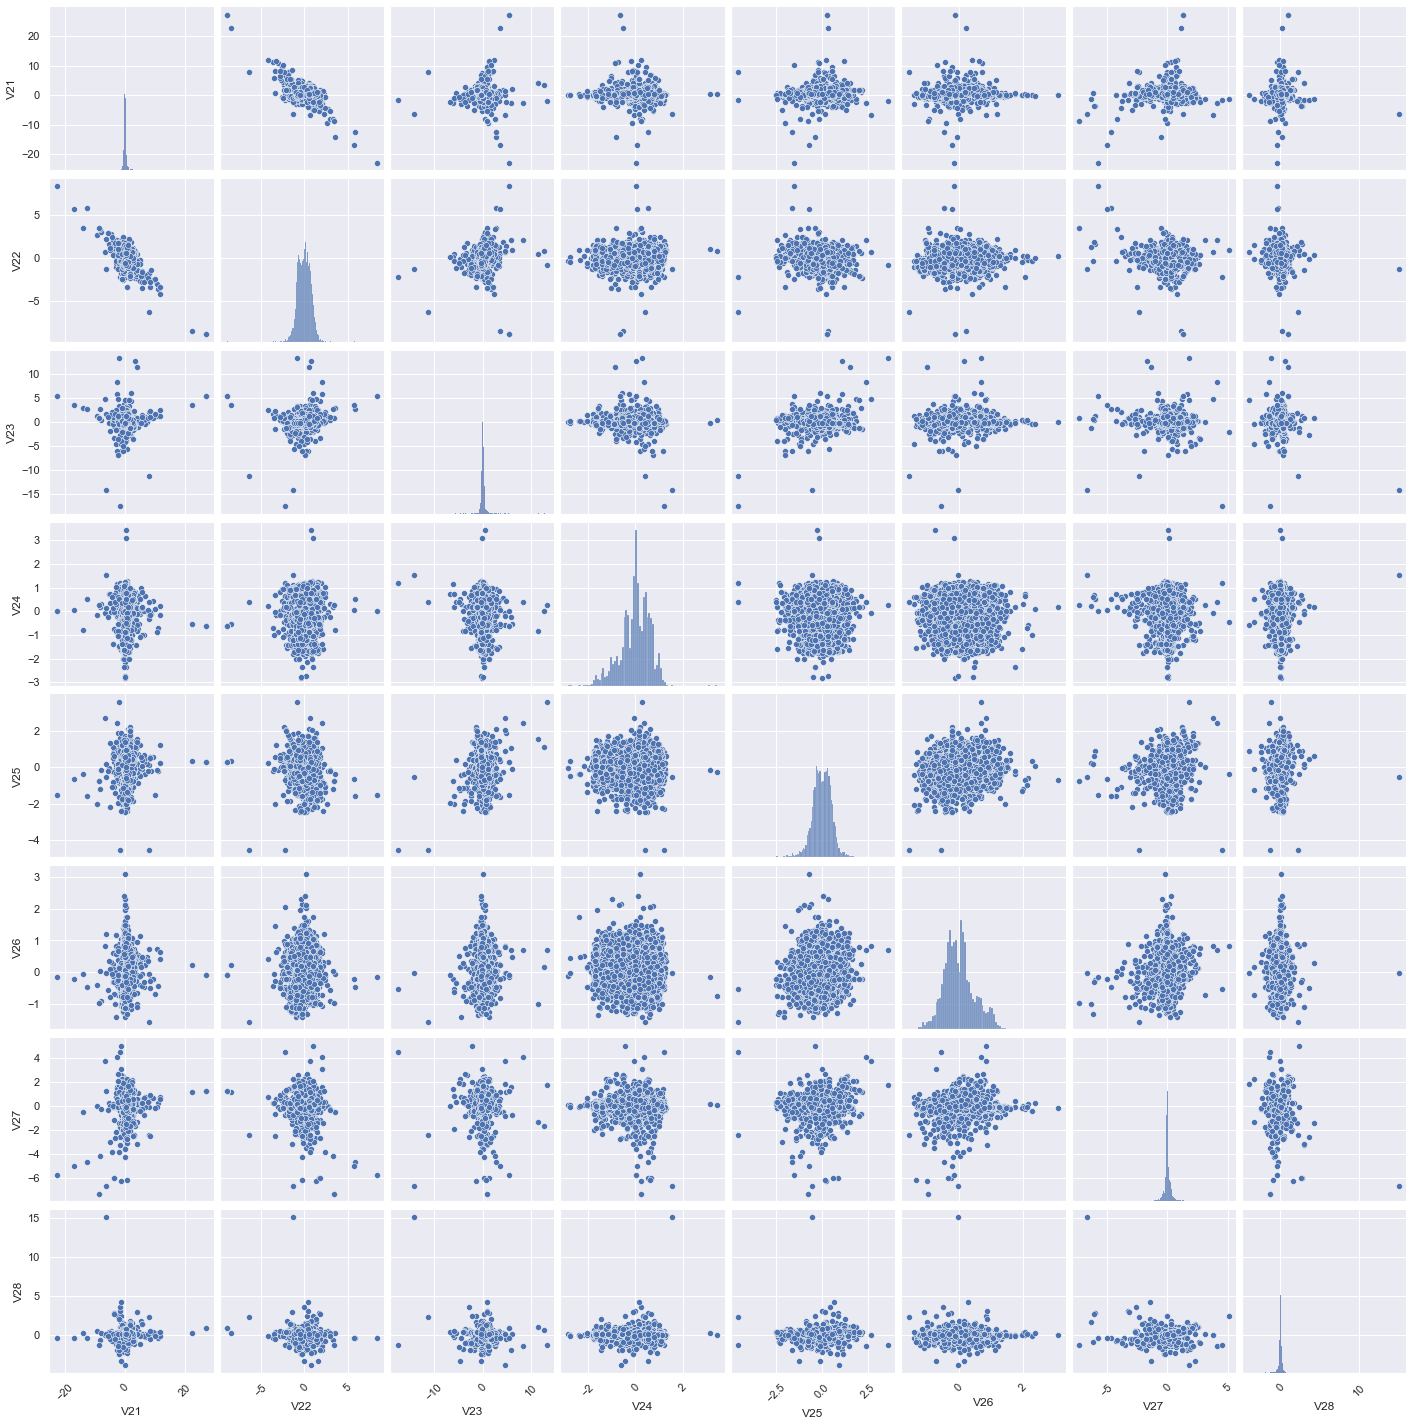

In [19]:
g=sns.pairplot(df[var_num_20_28],diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)
    
#plt.savefig('fig3',dpi=300)

Observando las anteriores gráficas podemos darnos cuenta de que aparentemente algunas variables presentan colinealidad con algunas otras, lo cual podría representar un problema para la confiabilidad en la estimación de los coeficientes. Para hacer un estudio más preciso, sería útil usar el factor de la inflación de la varianza.

**VIF(Variance inflation factor)**

Definición : En estadística, el factor de inflación de la varianza (FIV, a veces también conocido por su nombre en inglés, variance inflation factor, y de ahí VIF) cuantifica la intensidad de la multicolinealidad en un análisis de regresión normal de mínimos cuadrados. Proporciona un índice que mide hasta qué punto la varianza (el cuadrado de la desviación estándar estimada) de un coeficiente de regresión estimado se incrementa a causa de la colinealidad.

Se analiza la magnitud de la multicolinealidad considerando el tamaño de VIF. Si VIF>10, la multicolinealidad es alta. Para ello se usa la librería de Python variance_inflation_factor comos e muestra:

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()

In [22]:
X_pred_var=df.drop(['Class'], axis = 1)

In [23]:
#X_pred_var.shape[1]
#X_pred_var.shape
#variance_inflation_factor(X_pred_var.values,28)
#X_pred_var

In [24]:
vif["VIF Factor"] = [variance_inflation_factor(X_pred_var.values, i) for i in range(X_pred_var.shape[1])]

In [25]:
print(vif)

    VIF Factor
0     2.450036
1     2.822820
2     6.526507
3     3.038132
4     1.736484
5     5.212339
6     1.770408
7     8.629579
8     1.533431
9     1.389585
10    3.008505
11    1.757895
12    3.018215
13    1.013728
14    2.679461
15    1.040201
16    2.574414
17    3.997862
18    1.707888
19    1.143980
20    2.789244
21    1.336152
22    1.172457
23    1.312097
24    1.007886
25    1.044859
26    1.008295
27    1.144810
28    1.116790
29   16.223706


De lo anterior vemos que solo una variable (la V28) presenta multicolinealidad alta. Por lo que podríamos hacer un modelo aproximado usando todas las variables sin preocuparnos por la confiabilidad de los coeficientes estimados.

### Implementación de la regresión logística

Dividimos el Data frame en variables predictoras(features) y variable de respuesta o a predecir (labels).

In [26]:
# Vamos a "barajar" los datos antes de crear las submuestras.
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
## filas "randomizadas"
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

Unnamed: 0         V1         V2         V3         V4         V5  \
7158       15736 -23.914101  13.765942 -25.733734   6.290918 -17.784824   
7038      123141  -6.616293   3.563428  -7.058901   4.284346  -5.096299   
7093       12369 -18.018561  10.558600 -24.667741  11.786180 -10.564657   
7037       42856 -11.682215   6.332882 -13.297109   7.690772 -10.889891   
6116      265528   1.932394  -0.127166  -1.622555   0.422223   0.249094   

            V6         V7         V8        V9  ...       V21       V22  \
7158 -4.572498 -17.390764  15.794136 -3.819832  ...  1.773399 -1.748426   
7038 -1.768618  -4.937554   2.748460 -3.796760  ...  1.215976  0.041178   
7093 -2.645681 -18.023468   2.693655 -6.219464  ... -2.319479  0.908839   
7037 -2.792360 -12.561783   7.287122 -7.570322  ...  2.133456 -1.271509   
6116 -1.032982   0.532456  -0.335823  0.258458  ...  0.091620  0.399534   

           V23       V24       V25       V26       V27       V28  Amount  \
7158 -1.093104  0.147807  1.663792 -0.221024  1.458076  0.430315   99.99   
7038 -1.059098  0.275662  0.057425 -0.265838 -0.514637  0.388590  254.76   
7093  1.352904 -1.059222  0.185751  0.687037  2.078081 -1.429517    1.00   
7037 -0.035304  0.615054  0.349024 -0.428923 -0.694935 -0.818970  173.07   
6116 -0.007169  0.058469  0.302348 -0.246472 -0.042544 -0.067672   49.99   

      Class  
7158      1  
7038      1  
7093      1  
7037      1  
6116      0  

[5 rows x 31 columns]

In [27]:
non_frauds.shape

(492, 31)

In [28]:
frauds.shape

(300, 31)

In [29]:
features = new_df.drop(['Class','Unnamed: 0'], axis = 1)
# features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

var_array = features.values
var_resp_array = labels.values

Se divide el data frame en conjuntos de entrenamiento(training) y de prueba(testing) correspondiendo el conjunto de prueba al 20 por ciento del total de los datos. La normalización se refiere a cambiar la escala de los atributos numéricos reales a un rango de de 0 a 1.La normalización de datos se usa en el machine learning para hacer que el entrenamiento del modelo sea menos sensible a la escala de las variables. Esto permite que nuestro modelo converja a mejores pesos y, a su vez, conduce a un modelo más preciso.

In [30]:
X_train,X_test,y_train,y_test = train_test_split(var_array,var_resp_array,test_size=0.20)

# La normalización se refiere a cambiar la escala de los atributos numéricos de valor real en un rango de 0 a 1. 
# La normalización de datos se usa en el aprendizaje automático para hacer que el entrenamiento del modelo sea 
# menos sensible a la escala de las características.

X_train = normalize(X_train)
X_test=normalize(X_test)

Implementamos directamente la librería de ML scikit-learn para entrenar el modelo y ajustarlo.

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(var_array,var_resp_array,test_size=0.20)

# Inicialización del modelo
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
# Entrenamiento del modelo
model.fit(X_train, y_train)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=10.0, random_state=0, solver='liblinear')

Ahora definimos unas variables que nos ayudarán a identificar aspectos importantes (los llamados **Scores**) sobre el modelo, ellos son:

+ Accuracy: La precisión se puede definir como la relación entre el número de casos correctamente clasificados y el total de casos en evaluación. El mejor valor de precisión es 1 y el peor valor es 0.

+ Precision: La precisión es la relación tp / (tp + fp) donde tp es el número de verdaderos positivos y fp el número de falsos positivos. La precisión es intuitivamente la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa. El mejor valor es 1 y el peor valor es 0.

+ El recall es la relación tp / (tp + fn) donde tp es el número de verdaderos positivos y fn el número de falsos negativos. El recall es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas. El mejor valor es 1 y el peor valor es 0. Lea más en la Guía del usuario.

+ La puntuación F1 se puede interpretar como una media armónica de precisión y recuperación, donde una puntuación F1 alcanza su mejor valor en 1 y su peor puntuación en 0. La contribución relativa de precisión y recuperación a la puntuación F1 es igual.

+ Cuanto mayor sea la correlación entre los valores reales y predichos, mejor será la predicción. Este es el Coeficiente de Correlación de Matthews (MCC) cuando se aplica a los clasificadores.

In [32]:
p_pred = model.predict_proba(X_test)
Logitic_regression_label = model.predict(X_test)
score_ = model.score(X_test, Logitic_regression_label)
conf_m = confusion_matrix(y_test, Logitic_regression_label)
report = classification_report(y_test, Logitic_regression_label)

In [33]:
Logitic_regr_accuracy_score  = accuracy_score(y_test,Logitic_regression_label)
Logitic_regr_precison_score  = precision_score(y_test,Logitic_regression_label)
Logitic_regr_recall_score    = recall_score(y_test,Logitic_regression_label)
Logitic_regr_f1_score        = f1_score(y_test,Logitic_regression_label)
Logitic_regr_MCC             = matthews_corrcoef(y_test,Logitic_regression_label)

In [34]:
#printing
print("")
print("Fraud Detction using Logistic Regression")
print("Scores")
print("Accuracy -->",Logitic_regr_accuracy_score)
print("Precison -->",Logitic_regr_precison_score)
print("Recall -->",Logitic_regr_recall_score)
print("F1 -->",Logitic_regr_f1_score)
print("MCC -->",Logitic_regr_MCC)
print(classification_report(y_test,Logitic_regression_label))


Fraud Detction using Logistic Regression
Scores
Accuracy --> 0.9371069182389937
Precison --> 0.9298245614035088
Recall --> 0.8983050847457628
F1 --> 0.9137931034482759
MCC --> 0.8646297557783451
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       100
           1       0.93      0.90      0.91        59

    accuracy                           0.94       159
   macro avg       0.94      0.93      0.93       159
weighted avg       0.94      0.94      0.94       159



In [35]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#Clasificador sin entrenar , que asignará 0 a todo.
ns_probs = [0 for _ in range(len(y_test))]
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = p_pred[:, 1]

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.971


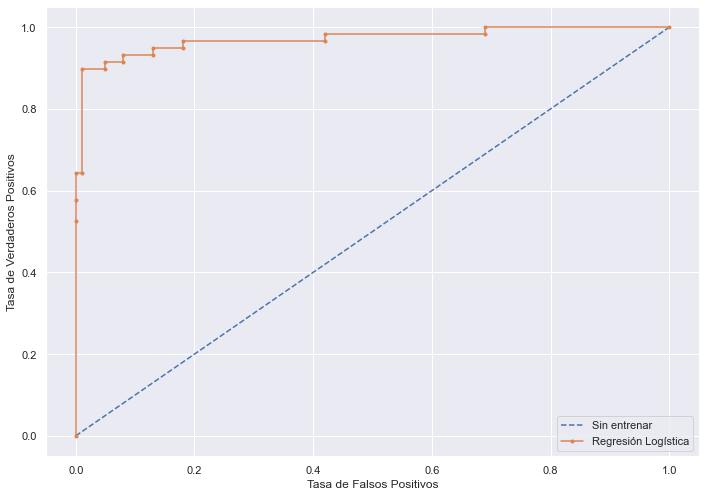

In [36]:

# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

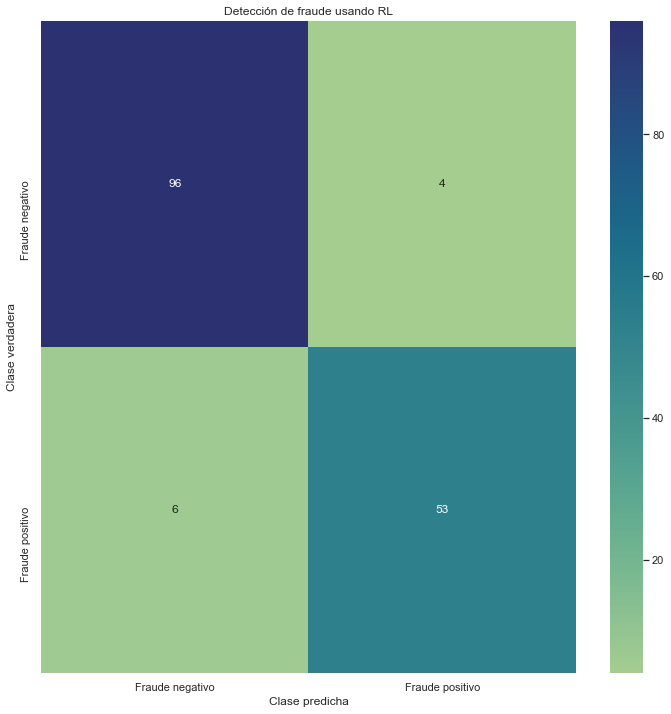

<Figure size 842.4x595.44 with 0 Axes>

In [37]:
import seaborn as sns
LABELS = ['Fraude negativo', 'Fraude positivo']
conf_matrix = confusion_matrix(y_test, Logitic_regression_label)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="crest");
plt.title("Detección de fraude usando RL")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()

plt.savefig('heatmappp',dpi=300)

## Regresión logística sin hacer submuestreo

In [38]:
features = df.drop(['Class','Unnamed: 0'], axis = 1)
# features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(df['Class'])

var_array = features.values
var_resp_array = labels.values

In [39]:
X_train,X_test,y_train,y_test = train_test_split(var_array,var_resp_array,test_size=0.20)

# La normalización se refiere a cambiar la escala de los atributos numéricos de valor real en un rango de 0 a 1. 
# La normalización de datos se usa en el aprendizaje automático para hacer que el entrenamiento del modelo sea 
# menos sensible a la escala de las características.

X_train = normalize(X_train)
X_test=normalize(X_test)

In [40]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(var_array,var_resp_array,test_size=0.20)

# Inicialización del modelo
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
# Entrenamiento del modelo
model.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [41]:
p_pred = model.predict_proba(X_test)
Logitic_regression_label = model.predict(X_test)
score_ = model.score(X_test, Logitic_regression_label)
conf_m = confusion_matrix(y_test, Logitic_regression_label)
report = classification_report(y_test, Logitic_regression_label)

In [42]:
Logitic_regr_accuracy_score  = accuracy_score(y_test,Logitic_regression_label)
Logitic_regr_precison_score  = precision_score(y_test,Logitic_regression_label)
Logitic_regr_recall_score    = recall_score(y_test,Logitic_regression_label)
Logitic_regr_f1_score        = f1_score(y_test,Logitic_regression_label)
Logitic_regr_MCC             = matthews_corrcoef(y_test,Logitic_regression_label)

In [43]:
#printing
print("")
print("Fraud Detction using Logistic Regression")
print("Scores")
print("Accuracy -->",Logitic_regr_accuracy_score)
print("Precison -->",Logitic_regr_precison_score)
print("Recall -->",Logitic_regr_recall_score)
print("F1 -->",Logitic_regr_f1_score)
print("MCC -->",Logitic_regr_MCC)
print(classification_report(y_test,Logitic_regression_label))


Fraud Detction using Logistic Regression
Scores
Accuracy --> 0.9897260273972602
Precison --> 0.9777777777777777
Recall --> 0.7586206896551724
F1 --> 0.854368932038835
MCC --> 0.8564848539420434
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1402
           1       0.98      0.76      0.85        58

    accuracy                           0.99      1460
   macro avg       0.98      0.88      0.92      1460
weighted avg       0.99      0.99      0.99      1460



In [44]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#Clasificador sin entrenar , que asignará 0 a todo.
ns_probs = [0 for _ in range(len(y_test))]
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = p_pred[:, 1]

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.959


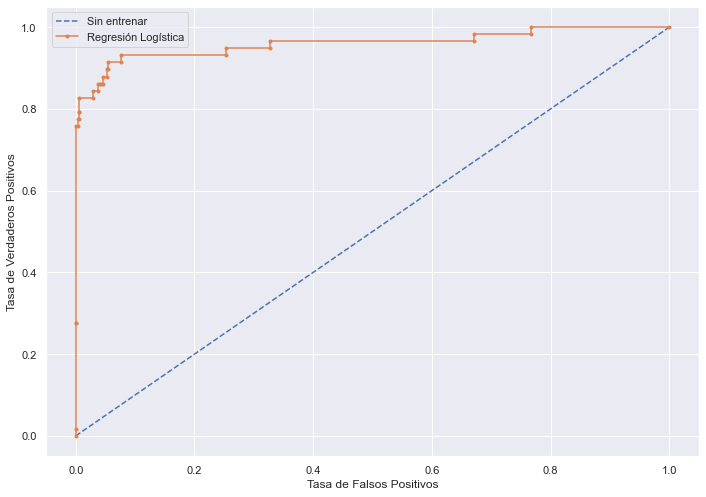

In [45]:

# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

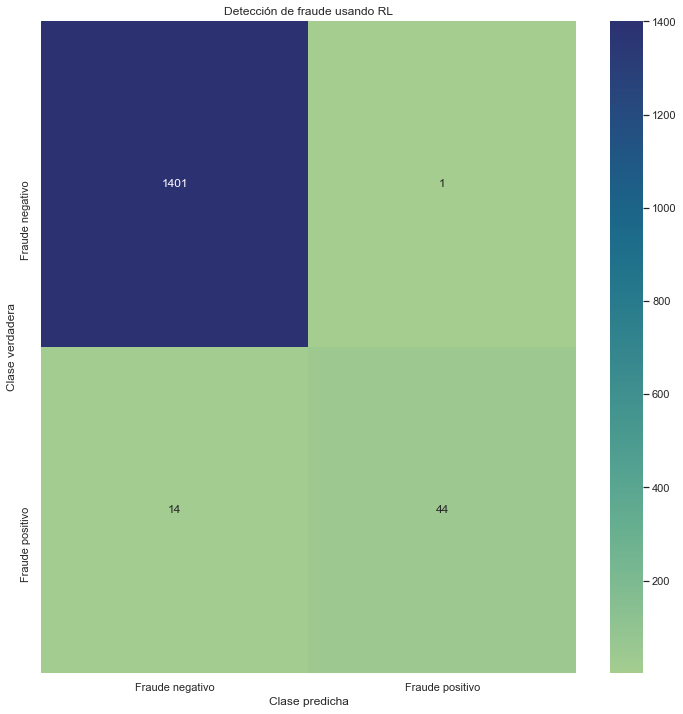

<Figure size 842.4x595.44 with 0 Axes>

In [46]:
import seaborn as sns
LABELS = ['Fraude negativo', 'Fraude positivo']
conf_matrix = confusion_matrix(y_test, Logitic_regression_label)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="crest");
plt.title("Detección de fraude usando RL")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()

plt.savefig('heatmappp',dpi=300)